In this homework, you need to solve four tasks. The assignment should be uploaded in Jupyter Notebook format(`.ipynb`). Overall, there are 23 points, however, you can get a maximum of 20 points for this assignment( `your_points = min(your_points, 20)`). No bonus points will be transferred to the next assignment.

# Task 1. Non-parametric Density Estimation (6 points)

In [ ]:
import numpy as np
import numpy.linalg as nla
import scipy
import scipy.stats
import pandas as pd

from statsmodels.nonparametric.kernel_regression import KernelReg

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Matplotlib settings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# # non-interactive
# %matplotlib inline

# #jupyterlab
# # %matplotlib widget 

# #jupyter-notebook
# # %matplotlib notebook 

# titlesize = 20
# labelsize = 16
# legendsize = labelsize
# xticksize = 14
# yticksize = xticksize

# matplotlib.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
# matplotlib.rcParams['legend.handletextpad'] = 0.5
# matplotlib.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
# matplotlib.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
# matplotlib.rcParams['font.size'] = 12
# matplotlib.rcParams['mathtext.fontset']='cm'
# matplotlib.rcParams['font.family'] = 'serif'
# matplotlib.rcParams['font.serif'] = 'Times New Roman'
# matplotlib.rcParams['axes.labelsize'] = labelsize
# matplotlib.rcParams['axes.titlesize'] = titlesize

# matplotlib.rc('xtick', labelsize=xticksize)
# matplotlib.rc('ytick', labelsize=yticksize)
# matplotlib.rc('legend', fontsize=legendsize)

You will work with data sampled from the mixture of Normal distributions:

In [ ]:
seed1 = 31337
seed2 = 42
n_samples = 100

f1 = scipy.stats.norm(loc=0, scale=1)
f2 = scipy.stats.norm(loc=5, scale=1)
p1 = 0.3
p2 = 1 - p1

Xa = f1.rvs(size=int(p1 * n_samples), random_state=seed1)
Xb = f2.rvs(size=int(p2 * n_samples), random_state=seed2)
samples = np.concatenate([Xa, Xb])

a = -5
b = 10

x_values = np.linspace(a, b, 1000)
binedges = np.linspace(a, b, 10)
true_pdf = p1 * f1.pdf(x_values) + p2 * f2.pdf(x_values)

## Histogram estimate

$\newcommand{\boldX}{\boldsymbol{X}}$
$\newcommand{\xs}[1]{\boldX^{(#1)}}$
$\newcommand{\Sum}{\sum\limits}$
$\newcommand{\Int}{\int\limits}$
$\newcommand{\hatp}{\widehat{p}}$
$\newcommand{\hatJ}{\widehat{J}}$
$\newcommand{\lp}{\left(}$
$\newcommand{\rp}{\right)}$

Given a sample $\boldsymbol{X}^{(n)} = \boldsymbol{X}_1, \boldsymbol{X}_2, ..., \boldsymbol{X}_n \sim \; iid \; p(x)$ we would like to build a hitogram estimate of the density. If we have $m$ bins of size $h$, we can have the following estimates of risk using leave-one-out cross validation:

\begin{gather*}
J(h) = \int \hatp^2\lp x;\xs{n} \rp dx - 2 \int \hatp \lp x;\xs{n} \rp p(x) dx, 
\end{gather*}

\begin{gather*}
\hatJ(h) = \int \hatp^2 \lp x;\xs{n} \rp dx - \frac{2}{n}\Sum_{i = 1}^n \hatp \lp \boldsymbol{X}_i ;\xs{n\backslash i} \rp, \label{eq1}\tag{1}
\end{gather*}

\begin{gather*}
\hatJ(h) = \frac{2}{(n - 1)h} - \frac{n+1}{(n-1)h}\Sum_{i = 1}^m \hatp_j^2,\quad \hatp_j = \frac{n_j}{n}. \label{eq2}\tag{2}
\end{gather*}

Your task is:
1. Build a histogram estimate of the pdf given the sample above, tune bandwidth using leave-one-out CV based on $\hatJ$. Use formula (\ref{eq2}) (1 point)
2. \* Prove that for histograms (\ref{eq2}) follows from (\ref{eq1}) (1 bonus point)
3. Plot CV estimates $\hatJ(h)$ that you obtained during selection. Mark optimal bandwidth $h_{cv}$ and report $h_{cv}$ and $\hatJ(h_{cv})$ (0.5 point)

In [ ]:
def cross_validation_histogram(sample, bandwidth, bins=None):
    n = len(sample)
    sample_min, sample_max = np.min(sample), np.max(sample)

    if bins:
        bin_edges = np.histogram(sample, bins=bins, range=(sample_min, sample_max), density=False)[1]
        bandwidth = bin_edges[1] - bin_edges[0]
    else:
        bins = np.int(np.ceil((sample_max - sample_min) / bandwidth))

    hist = np.histogram(sample, bins=bins, range=(sample_min, sample_max), density=False)[0]
    risk_estimate = 2 / ((n - 1) * bandwidth) - (n + 1) / ((n - 1) * bandwidth) * np.sum((hist / n) ** 2)
    
    return risk_estimate

In [ ]:
bandwidth_space = np.logspace(-1, 1, num=100)
cv_space = np.array([cross_validation_histogram(samples, bandwidth) for bandwidth in bandwidth_space])

In [ ]:
bandwidth_cv = bandwidth_space[np.argmin(cv_space)]
risk_cv = np.min(cv_space)

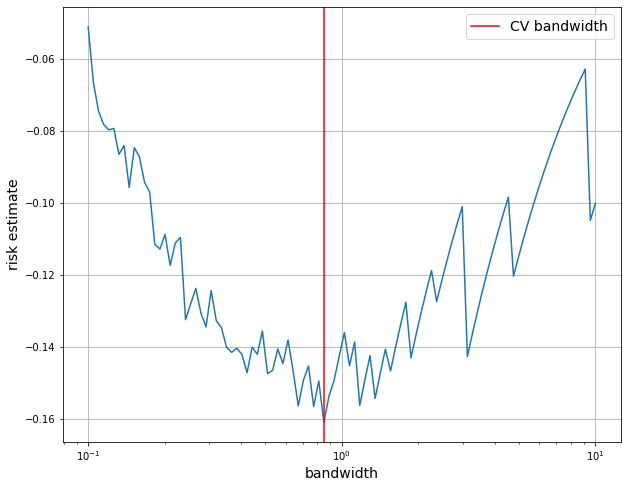

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(bandwidth_space, cv_space)
plt.axvline(bandwidth_cv, label='CV bandwidth', color='red')
plt.xscale('log', basex=10)

plt.xlabel('bandwidth', fontsize=14)
plt.ylabel('risk estimate', fontsize=14)

plt.legend(fontsize=14)
plt.grid()
plt.show()

In [ ]:
sample_min, sample_max = np.min(samples), np.max(samples)
bins = np.int(np.ceil((sample_max - sample_min) / bandwidth_cv))

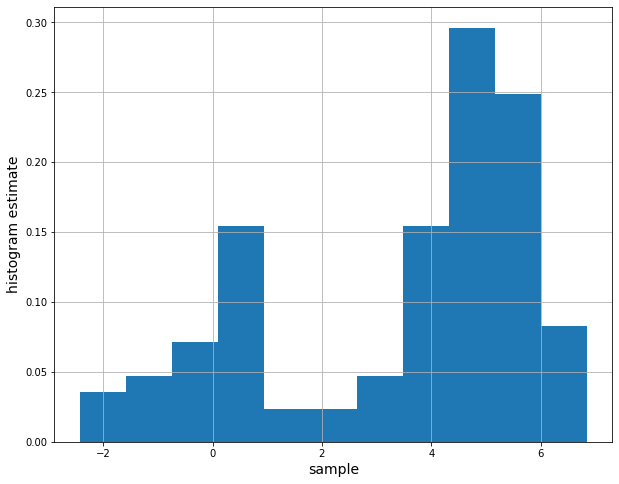

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(samples, bins=bins, density=True)
plt.grid()

plt.xlabel('sample', fontsize=14)
plt.ylabel('histogram estimate', fontsize=14)
plt.show()

4. Recall the approximation to $\text{MISE}$ from Lecture 8, slide 11. Suppose that an Oracle calculated the integral of the squared derivative of the true density for you and the value is $0.0804924$. What will be the approximate optimal bandwidth $h^*$? Find CV estimate of $J$ for this value of bandwidth and compare it to the one found in part 1 (0.5 point)
5. `np.histogram` has some built-in methods of selecting bandwidth. Compare some of them with your CV result and theoretical approximation (again, using CV estimate of $J$) (1 point)

$$\text{MISE}(\hat{p_n}, p) \approx \left[\int\big[p'(x)\big]^2 dx\right]\frac{h^2}{12} + \frac{1}{nh} = \frac{Ih^2}{12} + \frac{1}{nh}$$

We need to minimize MISE with respect to $h$, knowing the true value of $I$
$$\frac{\partial\text{MISE}}{\partial h} = \frac{2Ih}{12} - \frac{1}{nh^2} = \frac{Ih}{6} - \frac{1}{nh^2} = 0 
\Longrightarrow h^* = \left[\frac{n I}{6}\right]^{-1/3} $$


In [ ]:
I = 0.0804924
bandwidth_optimal = (len(samples) * I / 6)**(-1/3)

In [ ]:
risk_optimal = cross_validation_histogram(samples, bandwidth_optimal)

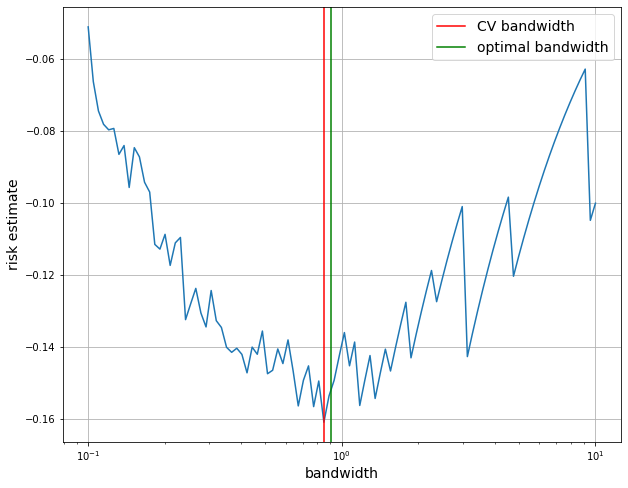

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(bandwidth_space, cv_space)
plt.axvline(bandwidth_cv, label='CV bandwidth', color='red')
plt.axvline(bandwidth_optimal, label='optimal bandwidth', color='green')
plt.xscale('log', basex=10)

plt.xlabel('bandwidth', fontsize=14)
plt.ylabel('risk estimate', fontsize=14)

plt.legend(fontsize=14)
plt.grid()
plt.show()

In [ ]:
print(f'cross validation bandwidth:\n{bandwidth_cv:.4f}\noptimal bandwidth:\n{bandwidth_optimal:.4f}')

cross validation bandwidth:
0.8498
optimal bandwidth:
0.9067


In [ ]:
print(f'risk estimate with cross validation bandwidth:\n{risk_cv:.4f}')
print(f'risk estimate with optimal bandwidth:\n{risk_optimal:.4f}')

risk estimate with cross validation bandwidth:
-0.1609
risk estimate with optimal bandwidth:
-0.1508


The obtained cross validation and optimal values of bandwidth are almost the same

In [ ]:
bins_settings = ['auto', 'scott', 'sqrt', 'rice']

for setting in bins_settings:
    print(f'risk estimate with numpy bins setting {setting}:\n{cross_validation_histogram(samples, None, bins=setting):.4f}\n')

risk estimate with numpy bins setting auto:
-0.1584

risk estimate with numpy bins setting scott:
-0.1474

risk estimate with numpy bins setting sqrt:
-0.1499

risk estimate with numpy bins setting rice:
-0.1499



## Kernel density estimate

In this part, you will use the same sample, but employ the kernel density estimation method. We can use the same proxy expression to optimise the risk:
\begin{gather*}
J(h) = \int \hatp^2 \lp x;\xs{n} \rp dx - 2 \int \hatp \lp x;\xs{n} \rp p(x) dx
\end{gather*}

In out case of kernel estimator, we can obtain:
\begin{gather*}
\hatJ(h) = \frac{1}{hn^2}\Sum_{i = 1}^n\Sum_{j = 1}^n K^{(2)}\lp\frac{x_i - x_j}{h}\rp + \frac{2K(0)}{nh}, \label{eq3}\tag{3}
\end{gather*}
where
\begin{gather*}
K^{(2)}(x) = K^*(x) - 2K(x), \quad K^*(x) = \int K(x - y) K(y) dy.
\end{gather*}

You can use [kernel density estimation from sklearn](http://scikit-learn.org/stable/modules/density.html). Your task is:
1. Build a kernel density estimate given the sample from before, tune bandwidth using leave-one-out CV. Try two different kernels of your choice. Use formula \ref{eq3} in your tuning procedure (1 point)
2. Plot CV estimates $\hatJ(h)$ that you obtained during selection. Mark optimal bandwidth $h_{cv}$ and report $h_{cv}$ and $\hatJ(h_{cv})$. What kernel worked better in terms of estimated surrogate risk? (0.5 point)

In [ ]:
from sklearn.neighbors import KernelDensity

In [ ]:
def cross_validation_kernel(sample, bandwidth, kernel, convolution):
    n = len(sample)
    risk = 0

    for i in range(n):
        for j in range(n):
            x = (samples[i] - samples[j]) / bandwidth
            risk += convolution(x) - 2 * kernel(x)

    risk = risk / (bandwidth * n ** 2) + 2 * kernel(0) / (n * bandwidth)
    return risk

### Gaussian Kernel

$$K(x) = \frac{1}{\sqrt{2 \pi}} \exp\Big[-x^2/2\Big]$$

$$t = y - x/2 \Longrightarrow K(x - y)K(y) = K(y - x)K(y) = K(t - x/2)K(t + x/2) = \frac{1}{2\pi}\exp\Big[-t^2\Big]\exp\Big[-x^2/4\Big]$$
$$K^*(x) = \int\limits_{\mathbb{R}} K(x - y) K(y) dy = \frac{\exp\Big[-x^2/4\Big]}{\sqrt{2\pi}}
\int\limits_{\mathbb{R}} \frac{1}{\sqrt{2\pi}}\exp\Big[-t^2\Big]dt =$$
$$= \frac{\exp\Big[-x^2/4\Big]}{2\sqrt{\pi}}\int\limits_{\mathbb{R}} \frac{1}{\sqrt{2\pi}}\exp\Big[-u^2/2\Big]du = 
\frac{\exp\Big[-x^2/4\Big]}{2\sqrt{\pi}}$$

In [ ]:
def gaussian_kernel(x):
    return np.exp(-x ** 2 / 2) / np.sqrt(2 * np.pi)

def gaussian_convolution(x):
    return np.exp(-x ** 2 / 4) / (2 * np.sqrt(np.pi))

In [ ]:
bandwidth_space = np.logspace(-1, 1, num=100)
cv_space = np.array([cross_validation_kernel(samples, bandwidth, gaussian_kernel, gaussian_convolution) for bandwidth in bandwidth_space])

In [ ]:
bandwidth_cv = bandwidth_space[np.argmin(cv_space)]
risk_cv = np.min(cv_space)

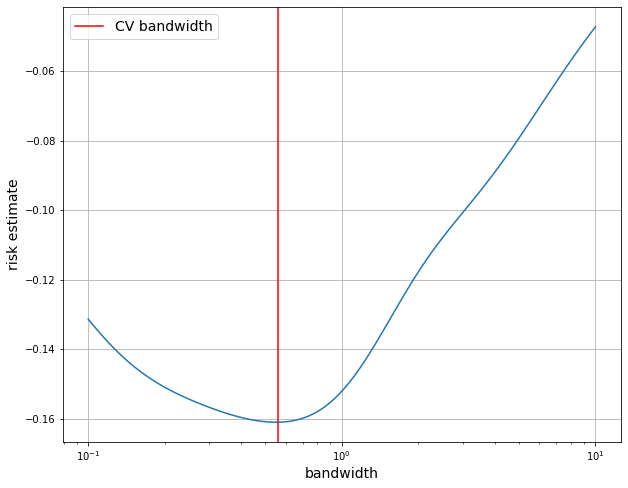

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(bandwidth_space, cv_space)
plt.axvline(bandwidth_cv, label='CV bandwidth', color='red')
plt.xscale('log', basex=10)

plt.xlabel('bandwidth', fontsize=14)
plt.ylabel('risk estimate', fontsize=14)

plt.legend(fontsize=14)
plt.grid()
plt.show()

In [ ]:
kde_cv = KernelDensity(kernel='gaussian', bandwidth=bandwidth_cv).fit(samples.reshape(-1,1))

In [ ]:
sample_min, sample_max = np.min(samples), np.max(samples)
grid = np.linspace(sample_min, sample_max, num=100)

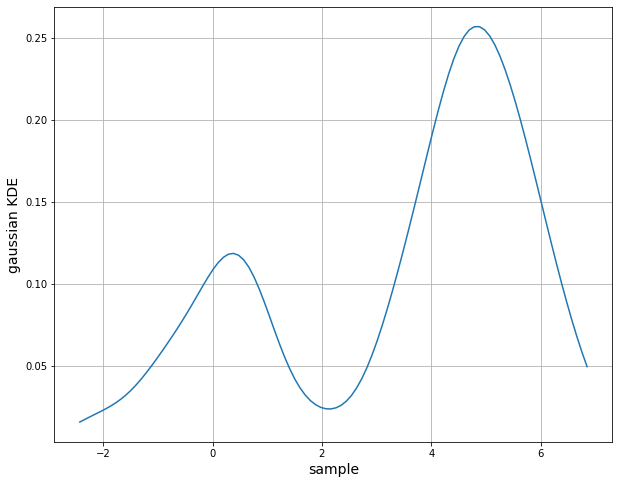

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(grid, np.exp(kde_cv.score_samples(grid[:, None])))
plt.grid()

plt.xlabel('sample', fontsize=14)
plt.ylabel('gaussian KDE', fontsize=14)
plt.show()

3. Recall the approximation to $\text{MISE}$ from Lecture 8, slide 20. Suppose that an Oracle calculated the integral of the squared second derivative of the true density for you and the value is $0.127529$. What will be the approximate optimal bandwidth $h^*$? Find CV estimate of $J$ for this value of bandwidth and compare it to the one found in part 1 (0.5 point)

$$\text{MISE}(\hat{p_n}, p) \approx \frac{\sigma_K^4 h^4}{4} \int \Big[p''(x)\Big]^2 dx + \frac{1}{nh} \int \Big[K(x)\Big]^2 dx = 
\frac{\sigma_K^4 h^4 I}{4} + \frac{1}{n h} \int \Big[K(x)\Big]^2 dx$$

We need to minimize MISE with respect to $h$, knowing the true value of $I$

$$h^* = \left[\frac{\displaystyle\int\limits_{\mathbb{R}} \Big[K(x)\Big]^2 dx}
{\left[\displaystyle\int\limits_{\mathbb{R}} x^2 K(x)dx\right]^2 In} \right]^{1/5}$$

$$\int\limits_{\mathbb{R}}\Big[K(x)\Big]^2 dx = \int\limits_{\mathbb{R}} \frac{1}{2 \pi} \exp\Big[-x^2\Big]dx = \frac{1}{2\sqrt{\pi}}$$

$$\int\limits_{\mathbb{R}} x^2 K(x) dx = \int\limits_{\mathbb{R}} \frac{x^2}{\sqrt{2 \pi}} \exp\Big[-x^2 / 2\Big] dx = 
\mathbb{E} z^2 = \mathbb{D} z + \Big[\mathbb{E} z\Big]^2 = 1$$

$$h^* = \left[\frac{1}{2 \sqrt{\pi} In}\right]^{1/5} $$

In [ ]:
I = 0.127529
bandwidth_optimal = (1 / (2 * np.sqrt(np.pi) * I * len(samples))) ** (1 / 5)

In [ ]:
risk_optimal = cross_validation_kernel(samples, bandwidth_optimal, gaussian_kernel, gaussian_convolution)

In [ ]:
kde_optimal = KernelDensity(kernel='gaussian', bandwidth=bandwidth_optimal).fit(samples.reshape(-1,1))

In [ ]:
sample_min, sample_max = np.min(samples), np.max(samples)
grid = np.linspace(sample_min, sample_max, num=100)

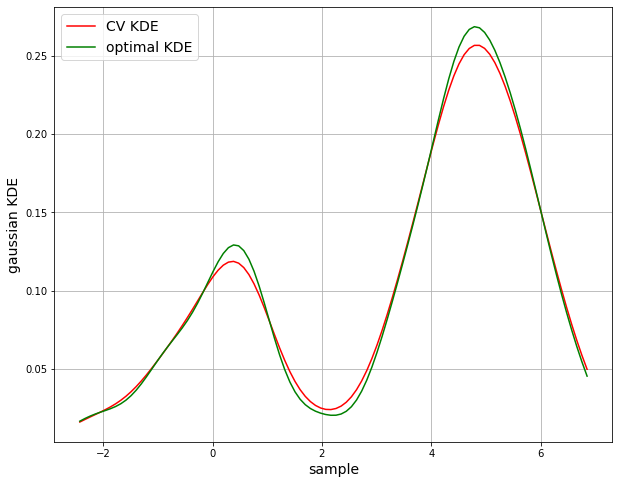

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(grid, np.exp(kde_cv.score_samples(grid[:, None])), color='red', label='CV KDE')
plt.plot(grid, np.exp(kde_optimal.score_samples(grid[:, None])), color='green', label='optimal KDE')
plt.grid()

plt.xlabel('sample', fontsize=14)
plt.ylabel('gaussian KDE', fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [ ]:
print(f'cross validation bandwidth:\n{bandwidth_cv:.4f}\noptimal bandwidth:\n{bandwidth_optimal:.4f}')

cross validation bandwidth:
0.5591
optimal bandwidth:
0.4666


In [ ]:
print(f'risk estimate with cross validation bandwidth:\n{risk_cv:.4f}')
print(f'risk estimate with optimal bandwidth:\n{risk_optimal:.4f}')

risk estimate with cross validation bandwidth:
-0.1610
risk estimate with optimal bandwidth:
-0.1606


Gaussian kernel with cross validation bandwidth provides slightly better results in terms of the estimated risk than histogram

### Rectangular kernel

$$K(x) = \frac12 \mathbb{I}\{ |x| < 1 \} $$

$$K^*(x) = \int\limits_{\mathbb{R}} K(x-y) K(y) dy = \frac{1}{4} \int\limits_{\mathbb{R}} \mathbb{I}\{ |x-y| < 1 \} \mathbb{I}\{ |y| < 1 \} dy = 
\frac{1}{4} \int\limits_{\mathbb{R}} \mathbb{I}\{ |x-y| < 1, |y| < 1 \} dy$$

The indicator function $\mathbb{I}\{ |x - y| < 1, |y| < 1 \} = 1$ when $y \in S = \mathbf{U}(0) \cap \mathbf{U}(x)$, where $\mathbf{U}(z)$ 
is one dimensional unit ball centered at $z$. Hence if $|x| > 2$, then $K^*(x) = 0$. The integral of the indicator function can be 
expressed as follows
$$K^*(x) = \frac{1}{4} \int\limits_{\mathbb{R}} \mathbb{I}\{ |x-y| < 1, |y| < 1 \} dy = \frac{1}{4} \int\limits_{S} dy = 
\frac{1}{4}\Big[1 - \Big[|x| - 1\Big]\Big] = \frac14 \Big[2 - |x|\Big] = \frac12 - \frac{|x|}{4}$$

In [ ]:
def rectangular_kernel(x):
    return 0.5 * int(np.abs(x) < 1)
  
def rectangular_convolution(x):
    return (1 / 2 - np.abs(x) / 4) * int(np.abs(x) < 2)

In [ ]:
bandwidth_space = np.logspace(-1, 1, num=100)
cv_space = np.array([cross_validation_kernel(samples, bandwidth, rectangular_kernel, rectangular_convolution) for bandwidth in bandwidth_space])

In [ ]:
bandwidth_cv = bandwidth_space[np.argmin(cv_space)]
risk_cv = np.min(cv_space)

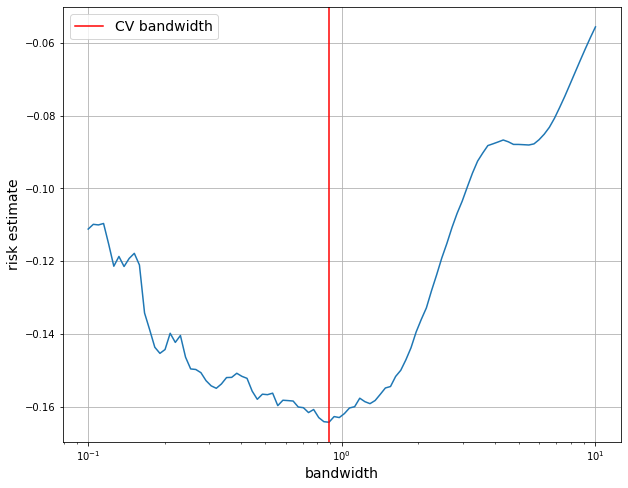

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(bandwidth_space, cv_space)
plt.axvline(bandwidth_cv, label='CV bandwidth', color='red')
plt.xscale('log', basex=10)

plt.xlabel('bandwidth', fontsize=14)
plt.ylabel('risk estimate', fontsize=14)

plt.legend(fontsize=14)
plt.grid()
plt.show()

In [ ]:
kde_cv = KernelDensity(kernel='tophat', bandwidth=bandwidth_cv).fit(samples.reshape(-1,1))

In [ ]:
sample_min, sample_max = np.min(samples), np.max(samples)
grid = np.linspace(sample_min, sample_max, num=100)

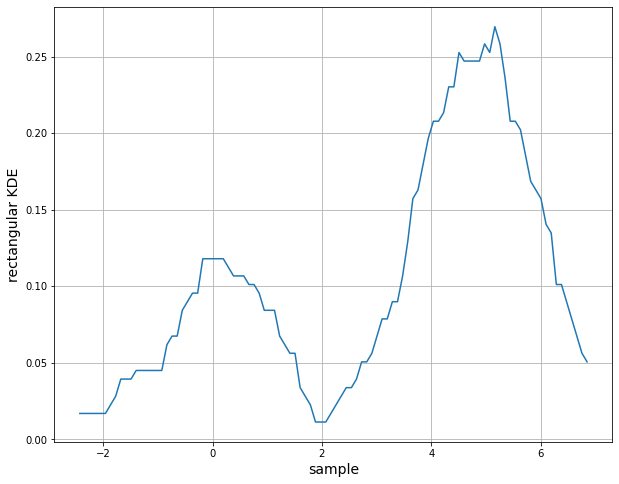

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(grid, np.exp(kde_cv.score_samples(grid[:, None])))
plt.grid()

plt.xlabel('sample', fontsize=14)
plt.ylabel('rectangular KDE', fontsize=14)
plt.show()

$$\text{MISE}(\hat{p_n}, p) \approx \frac{\sigma_K^4 h^4}{4} \int \Big[p''(x)\Big]^2 dx + \frac{1}{nh} \int \Big[K(x)\Big]^2 dx = 
\frac{\sigma_K^4 h^4 I}{4} + \frac{1}{n h} \int \Big[K(x)\Big]^2 dx$$

We need to minimize MISE with respect to $h$, knowing the true value of $I$

$$h^* = \left[\frac{\displaystyle\int\limits_{\mathbb{R}} \Big[K(x)\Big]^2 dx}
{\left[\displaystyle\int\limits_{\mathbb{R}} x^2 K(x)dx\right]^2 In} \right]^{1/5}$$

$$\int\limits_{\mathbb{R}} \Big[K(x)\Big]^2 dx = \int\limits_{\mathbb{R}} \frac{1}{4} \mathbb{I}\{|x| < 1\}^2 dx = 
\frac{1}{4} \int\limits_{\mathbb{R}} \mathbb{I}\{|x| < 1\} dx = \frac{1}{2}$$

$$\int\limits_{\mathbb{R}} x^2 K(x) dx = \frac{1}{4}\int\limits_{\mathbb{R}} x^2 \mathbb{I}\{|x| < 1\} dx = 
\frac{1}{4} \int\limits_{-1}^{1} x^2 dx = \frac{x^3}{12}\Bigg|_{-1}^{1} = \frac{1}{6} $$

$$h^* = \left[\frac{18}{In}\right]^{1/5}$$

In [ ]:
I = 0.127529
bandwidth_optimal = (18 / (I * len(samples))) ** (1 / 5)

In [ ]:
risk_optimal = cross_validation_kernel(samples, bandwidth_optimal, rectangular_kernel, rectangular_convolution)

In [ ]:
kde_optimal = KernelDensity(kernel='tophat', bandwidth=bandwidth_optimal).fit(samples.reshape(-1, 1))

In [ ]:
sample_min, sample_max = np.min(samples), np.max(samples)
grid = np.linspace(sample_min, sample_max, num=100)

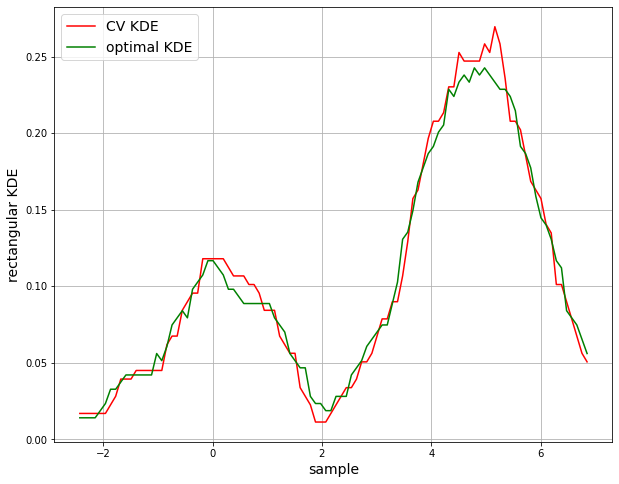

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(grid, np.exp(kde_cv.score_samples(grid[:, None])), color='red', label='CV KDE')
plt.plot(grid, np.exp(kde_optimal.score_samples(grid[:, None])), color='green', label='optimal KDE')
plt.grid()

plt.xlabel('sample', fontsize=14)
plt.ylabel('rectangular KDE', fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [ ]:
print(f'cross validation bandwidth:\n{bandwidth_cv:.4f}\noptimal bandwidth:\n{bandwidth_optimal:.4f}')

cross validation bandwidth:
0.8902
optimal bandwidth:
1.0714


In [ ]:
print(f'risk estimate with cross validation bandwidth:\n{risk_cv:.4f}')
print(f'risk estimate with optimal bandwidth:\n{risk_optimal:.4f}')

risk estimate with cross validation bandwidth:
-0.1643
risk estimate with optimal bandwidth:
-0.1604


Rectangular kernel with cross validation bandwidth provides significantly better results in terms of the estimated risk than both 
histogram and guassian kernel

# Task 2. Non-parametric Regression (5.5 pt)

In this task you will apply non-parametric regression to airport statistics data.

### Data loading and preprocessing

Load dataset from `airport_operations_report.csv`. Use `General Aviation: Total Operations` as target (dependent) variable and `[Air Carrier Operations, General Aviation: Local Operations]` as covariates(independent variables). Divide $1^{st}$ covariate by `1000`, $2^{nd}$ by `100` and target by `1000`. Make a 2D grid for covariates from minimum to maximum values with `100` steps along each dimension.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Principles of Applied Statistics/homework-3'

/content/gdrive/MyDrive/Colab Notebooks/Principles of Applied Statistics/homework-3


In [ ]:
df = pd.read_csv('airport-operations-report.csv')

In [ ]:
df.head()

,Air Carrier Operations,General Aviation: Local Operations,General Aviation: Total Operations
0,10329.0,4.0,2219.0
1,10593.0,28.0,3312.0
2,11320.0,56.0,3310.0
3,11936.0,0.0,3382.0
4,11726.0,256.0,4242.0


In [ ]:
car_name = 'Air Carrier Operations'
local_name = 'General Aviation: Local Operations'
total_name = 'General Aviation: Total Operations'

In [ ]:
df[car_name] /= 1000
df[local_name] /= 100
df[total_name] /= 1000

In [ ]:
df.head()

,Air Carrier Operations,General Aviation: Local Operations,General Aviation: Total Operations
0,10.329,0.04,2.219
1,10.593,0.28,3.312
2,11.320,0.56,3.310
3,11.936,0.00,3.382
4,11.726,2.56,4.242


In [ ]:
car_space = np.linspace(df[car_name].min(), df[car_name].max(), num=100)
local_space = np.linspace(df[local_name].min(), df[local_name].max(), num=100)

In [ ]:
grid = np.meshgrid(car_space, local_space)
grid_pairs = np.vstack([grid[0].ravel(), grid[1].ravel()]).T

### Fit model (1 pt)

Perform a nonparametric regression to fit the model $Y = f(x)+\varepsilon$.

In [ ]:
from statsmodels.nonparametric.kernel_regression import KernelReg

In [ ]:
regression = KernelReg(df[total_name], df[[car_name, local_name]], var_type='cc', reg_type='lc')

Predict values for the created grid.

In [ ]:
step_numbers = (100, 100)
prediction = regression.fit(grid_pairs)[0].reshape(*step_numbers)

grid = np.meshgrid(car_space, local_space)
area = np.empty((*step_numbers, 2))

area[:, :, 0] = grid[0]
area[:, :, 1] = grid[1]

This is function to visualize 3D surfaces. You can modify it if you need.

In [ ]:
def plot_surface_function(x, y, z, min_max_values=None, ax=None):
    
    if ax is None:
        fig = plt.figure(figsize=(12, 10))
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(x, y, z, cmap=cm.rainbow, linewidth=0.5, alpha=0.5, edgecolor='k')
        
        if min_max_values is not None:
            ax.set_xlim3d(*min_max_values[0])
            ax.set_ylim3d(*min_max_values[1])
    else:
        surf = ax.plot_surface(x, y, z, cmap=cm.bwr, linewidth=0.5, alpha=0.1, edgecolor='k')
        
    return ax

Let's plot the estimated surface.

In [ ]:
sample = df[[car_name, local_name]].values
target = df[total_name].values

x_min_max_values = [area[:, :, 0].min(), area[:, :, 0].max()]
y_min_max_values = [area[:, :, 1].min(), area[:, :, 1].max()]

min_max_values = np.vstack([x_min_max_values, y_min_max_values])

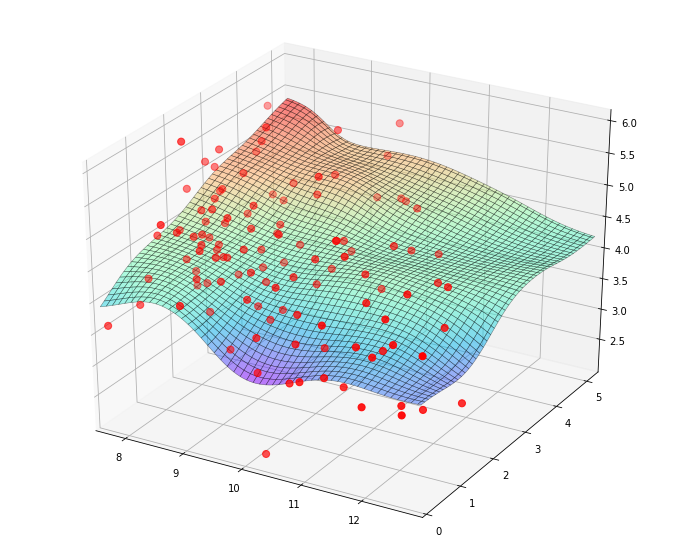

In [ ]:
ax = plot_surface_function(area[:, :, 0], area[:, :, 1], prediction, min_max_values)
ax.scatter(sample[:, 0], sample[:, 1], target, marker='o', s=50, c='r')
plt.show()

### Estimate confidence intervals (2 pt)

Construct 95\% confidence bands for your estimate. To estimate error variance for 1D covariate, you sort your sample and subtract target values of the nearest points. For 2D covariate, you should, for each point, calculate the difference in target values between a point and its nearest neighbor (in euclidian metric). 

To get power for quantile of the standard normal distribution, which is $\frac{h}{b-a}$ for 1D, estimate it per coordinate and multiply: $\prod_{i=1}^2 \frac{h_i}{b_i-a_i}$. 

For gaussian kernel $h = 3 \times$ kernel_bandwidth.

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KDTree

import scipy as sp

In [ ]:
def guassian_kernel(x, y, bandwidth):
    return 1 / np.sqrt(2 * np.pi) * rbf_kernel(x / bandwidth, y / bandwidth, 0.5)

In [ ]:
def prediction_standard_error(grid, sample, target, bandwidth, significance_level=0.05):
    n = target.shape[0]

    # find the nearest neighbours for all points in the working area
    kdt = KDTree(sample, metric='euclidean')
    distances, neighbors = kdt.query(sample, k=2, return_distance=True)

    # since the first nearest neighbour of any point is this point itself, select only the second neighbour
    distances, neighbors = distances[:, 1], neighbors[:, 1]

    # evaluate sigma squared which is used for confidence band
    sigma = np.sqrt(np.sum((target - target[neighbors]) ** 2) / (2 * (n - 1)))

    # evaluate weights of Nadaraya-Watson estimator
    kernel_values = guassian_kernel(grid, sample, bandwidth)
    kernel_norm = np.sum(kernel_values, axis=1, keepdims=True)

    nonzero_mask = kernel_norm[:, 0] > 1e-8
    kernel_weights = kernel_values

    kernel_weights[nonzero_mask] = kernel_weights[nonzero_mask] / kernel_norm[nonzero_mask]
    kernel_weights[~nonzero_mask] = 0

    # evaluate the final expression for standard error
    deviation_estimate = np.sqrt(np.sum(kernel_weights ** 2, axis=1)) * sigma
    power = np.prod(3 * bandwidth / (np.max(sample, axis=0) - np.min(sample, axis=0)))
    quantile = sp.stats.norm.ppf((1 + (1 - significance_level) ** power) / 2)

    return quantile * deviation_estimate

In [ ]:
sample = df[[car_name, local_name]].values
target = df[total_name].values

In [ ]:
standard_error = prediction_standard_error(grid_pairs, sample, target, regression.bw).reshape(*step_numbers)

Let's plot confidence intervals

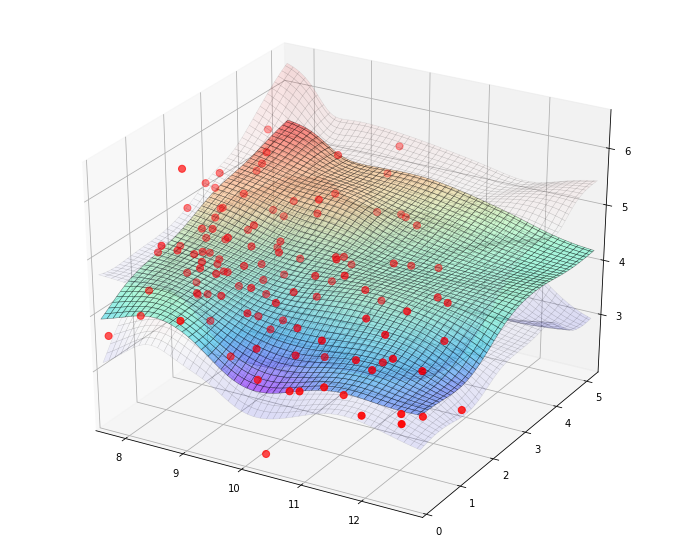

In [ ]:
ax = plot_surface_function(area[:, :, 0], area[:, :, 1], prediction, min_max_values)
ax.scatter(sample[:, 0], sample[:, 1], target, marker='o', s=50, c='r')

ax = plot_surface_function(area[:, :, 0], area[:, :, 1], prediction + standard_error, ax=ax)
ax = plot_surface_function(area[:, :, 0], area[:, :, 1], prediction - standard_error, ax=ax)
plt.show()

### Find optimal bandwidth (2 pt)

Use cross-validation to estimate the bandwidth.

In [ ]:
def cross_validation_regression(sample, target, bandwidth):
    n = sample.shape[0]

    kernel_values = guassian_kernel(sample, sample, bandwidth)
    kernel_norm = np.sum(kernel_values, axis=1) + 1e-8
    
    regression = KernelReg(target, sample, var_type='cc', reg_type='lc', bw=bandwidth)
    kernel_at_zero = 1 / np.sqrt(2 * np.pi)

    risk_estimate = np.sum((target - regression.fit(sample)[0]) ** 2 / (1 - kernel_at_zero / kernel_norm) ** 2)
    return risk_estimate

Make a grid with logarithmic scale to find best bandwidth, from `0.1` to `10` with `21` steps along each dimension. Visualize the obtained results with `plot_surface_function`. Print values of optimal bandwidth.

In [ ]:
bandwidth_space_x = np.exp(np.linspace(np.log(0.1), np.log(10), 21)) # shoutout to Elon Musk
bandwidth_space_y = bandwidth_space_x.copy()

bandwidth_space = np.meshgrid(bandwidth_space_x, bandwidth_space_y)
bandwidth_pairs = np.vstack([bandwidth_space[0].ravel(), bandwidth_space[1].ravel()]).T

In [ ]:
sample = df[[car_name, local_name]].values
target = df[total_name].values

In [ ]:
cv_space = np.array([cross_validation_regression(sample, target, bandwidth_pair) for bandwidth_pair in bandwidth_pairs]).reshape(21, 21)

Plot surface with estimated bandwidth.

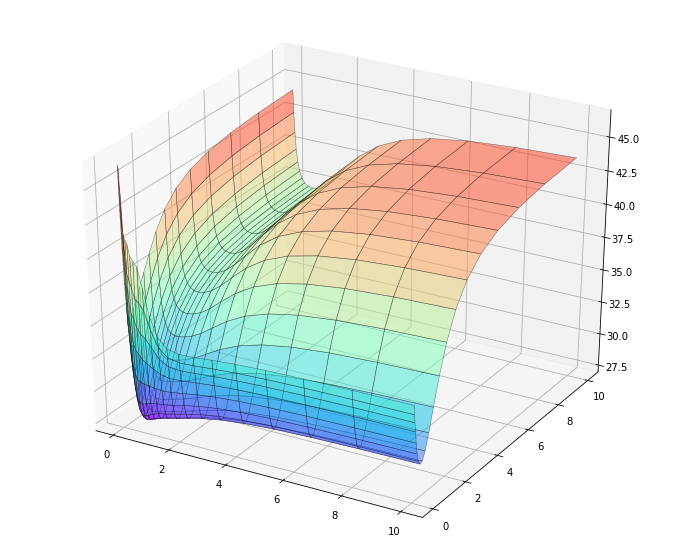

In [ ]:
bandwidth_area = np.empty((21, 21, 2))
bandwidth_area[:, :, 0] = bandwidth_space[0]
bandwidth_area[:, :, 1] = bandwidth_space[1]

ax = plot_surface_function(bandwidth_area[:, :, 0], bandwidth_area[:, :, 1], cv_space)
plt.show()

In [ ]:
bandwidth_optimal = bandwidth_pairs[np.nanargmin(cv_space)]
print(f'optimal bandwidth:\n{bandwidth_optimal}')

optimal bandwidth:
[0.50118723 0.50118723]


### Conclusion (0.5 pt)

Write your conclusions about conducted experiments (2-5 sentence).

The most interesting and significant thing about experiments on Nadaraya-Watson estimator with bandwidth from uncretainty estimation perspective 
is that the band expands at those points of feature space which appear to be far from the given train observation. Hence, the closer some test point 
is to the given data, the higher our certainty about the prediction for it and the shorter is the confidence band

Moreover, since the target variable has quite a wide spread, the optimal cross validation bandwidth of guassian kernel appears to be 
comparably small in order not to oversmooth the function

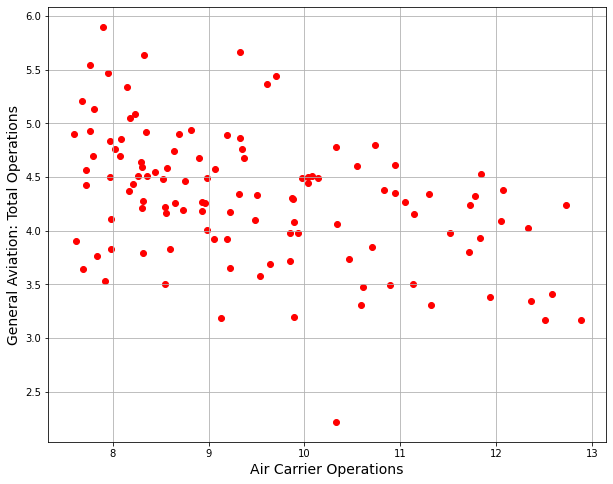

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df[car_name], df[total_name], marker='o', color='red')

plt.xlabel('Air Carrier Operations', fontsize=14)
plt.ylabel('General Aviation: Total Operations', fontsize=14)

plt.grid()
plt.show()

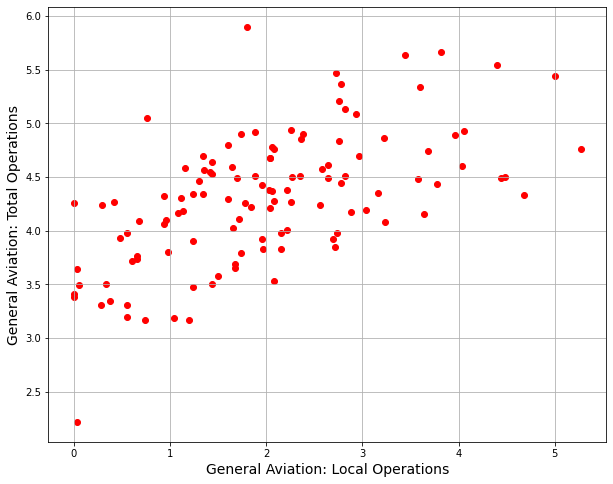

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df[local_name], df[total_name], marker='o', color='red')

plt.xlabel('General Aviation: Local Operations', fontsize=14)
plt.ylabel('General Aviation: Total Operations', fontsize=14)

plt.grid()
plt.show()

# Task 3. Model Selection (5.5 pt)

In this task you will select a model (choose a set of covariates) using AIC criteria and forward/backward stepwise regression.

In [9]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Principles of Applied Statistics/homework-3'

/content/gdrive/MyDrive/Colab Notebooks/Principles of Applied Statistics/homework-3


### Data loading and preprocessing

Read dataset `pacn_wrcc.csv`. The target variable is `ly Solar Rad.`, others are covariates.

In [12]:
df = pd.read_csv('pacn-wrcc.csv')

In [13]:
df.head()

,mph Wind Speed,Deg Wind Direc,Deg F Av Air Temp,% Rel Humidty,volts Battery Voltage,Deg Dir MxGust,mph Mx Gust Speed,ly Solar Rad.,Deg F Mn Air Temp,Deg F Mx Air Temp,"Deg F 2"" Soil Ave Tmp","Deg F 4"" Soil Ave Tmp","Deg F 8"" Soil Av Temp","Deg F 20""Soil Av Temp"
0,4.428,49.35,59.96,88.2,12.52,85.0,16.24,5.748000,59.37,60.33,64.28,61.68,61.85,61.37
1,4.347,30.13,59.33,91.2,12.33,40.0,16.37,0.218700,58.52,59.73,63.61,61.77,61.65,61.25
2,4.592,35.97,58.60,89.7,12.26,163.0,21.54,0.007225,58.34,58.84,62.90,61.80,61.57,61.20
3,4.264,19.19,58.33,88.9,12.24,35.0,17.34,0.009203,58.05,58.72,62.36,61.74,61.47,61.14
4,3.755,8.62,58.19,89.6,12.22,164.0,16.89,0.006709,57.87,58.53,61.79,61.72,61.47,61.12


Scale covariates to range `[0, 1]` and add bias column.

In [14]:
x, y = df.drop(columns=['ly Solar Rad.']), df['ly Solar Rad.'].values

In [15]:
x -= x.min()
x /= x.max()
x['bias'] = pd.Series(np.ones(len(x)))

In [16]:
x.head()

,mph Wind Speed,Deg Wind Direc,Deg F Av Air Temp,% Rel Humidty,volts Battery Voltage,Deg Dir MxGust,mph Mx Gust Speed,Deg F Mn Air Temp,Deg F Mx Air Temp,"Deg F 2"" Soil Ave Tmp","Deg F 4"" Soil Ave Tmp","Deg F 8"" Soil Av Temp","Deg F 20""Soil Av Temp",bias
0,0.385036,0.137073,0.452415,0.709667,0.289256,0.232493,0.455965,0.492595,0.414765,0.567308,0.392435,0.485915,0.430556,1.0
1,0.372742,0.083667,0.407670,0.808644,0.132231,0.106443,0.461701,0.426345,0.374497,0.513622,0.413712,0.415493,0.347222,1.0
2,0.409926,0.099894,0.355824,0.759155,0.074380,0.450980,0.689816,0.412315,0.314765,0.456731,0.420804,0.387324,0.312500,1.0
3,0.360146,0.053268,0.336648,0.732761,0.057851,0.092437,0.504501,0.389712,0.306711,0.413462,0.406619,0.352113,0.270833,1.0
4,0.282896,0.023897,0.326705,0.755856,0.041322,0.453782,0.484645,0.375682,0.293960,0.367788,0.401891,0.352113,0.256944,1.0


### $C_p$ Mallow and sample variance (2 pt) 

Estimate sample variance of error with full set of covariates. Take into account number of dependent variables.

In [17]:
regressor = LinearRegression(fit_intercept=False)
regressor.fit(x, y)

prediction = regressor.predict(x)

In [18]:
noise_estimate = y - prediction
noise_variance = np.var(noise_estimate)

Implement estimation of $C_p$ Mallow for given covariates, target and error variance.

In [19]:
def cp(x, y, noise_variance):
    # construct model
    regressor = LinearRegression(fit_intercept=False)
    regressor.fit(x, y)

    # estimate target and noise
    prediction = regressor.predict(x)
    noise_estimate = y - prediction

    # calculate risk and complexity
    risk = np.sum(noise_estimate ** 2)
    complexity = 2 * len(x.columns) * noise_variance

    # evaluate cp statistic
    cp_statistic = risk + complexity
    return cp_statistic

In [20]:
cp(x, y, noise_variance)

8924.792853971016

### Forward stepwise regression (1 pt)

Implement forward stepwise regression. Save the order in which covariates are added to feature set and $C_p$ values for those feature sets.

In [21]:
def forward_stepwise_regression(x, y, noise_variance):
    covariates_collected = []
    covariates_left = list(x.columns)

    cp_statistic_collected = []
    cp_statistic_last = np.inf

    for i in range(len(x.columns)):
        covariate_last = None
        
        for covariate in covariates_left:
            x_subspace = x[covariates_collected + [covariate]]
            cp_statistic = cp(x_subspace, y, noise_variance)
            
            if cp_statistic < cp_statistic_last:
                cp_statistic_last = cp_statistic
                covariate_last = covariate

        if covariate_last == None:
            break

        covariates_collected.append(covariate_last)
        cp_statistic_collected.append(cp_statistic_last)
        covariates_left.remove(covariate_last)
        
    return covariates_collected, cp_statistic_collected

In [22]:
features, cp_list = forward_stepwise_regression(x, y, noise_variance)
for a, cp_value in enumerate(cp_list, 1):
    print(f"Cp = {cp_value:.3f} after appending covariates from the following list\n{features[:a]}\n")

Cp = 35187.964 after appending covariates from the following list
['Deg F Mx Air Temp']

Cp = 17090.945 after appending covariates from the following list
['Deg F Mx Air Temp', '% Rel Humidty']

Cp = 13821.965 after appending covariates from the following list
['Deg F Mx Air Temp', '% Rel Humidty', 'volts Battery Voltage']

Cp = 11569.194 after appending covariates from the following list
['Deg F Mx Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed']

Cp = 10138.774 after appending covariates from the following list
['Deg F Mx Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed', 'Deg F 4" Soil Ave Tmp']

Cp = 9627.511 after appending covariates from the following list
['Deg F Mx Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed', 'Deg F 4" Soil Ave Tmp', 'Deg F Av Air Temp']

Cp = 8998.556 after appending covariates from the following list
['Deg F Mx Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed'

In [23]:
a, round(cp_value, 3)

(10, 8750.439)

### Backward stepwise regression (1 pt)

Implement backward stepwise regression. Save the order in which covariates are removed from feature set and $C_p$ values for those feature sets.

In [24]:
def backward_stepwise_regression(x, y, noise_variance):
    covariates_reduced = []
    covariates_left = list(x.columns)

    cp_statistic_reduced = []
    cp_statistic_last = cp(x, y, noise_variance)

    for i in range(len(x.columns)):
        covariate_last = None
        
        for covariate in covariates_left:
            x_subspace = x[[c for c in covariates_left if c != covariate]]
            cp_statistic = cp(x_subspace, y, noise_variance)
            
            if cp_statistic < cp_statistic_last:
                cp_statistic_last = cp_statistic
                covariate_last = covariate

        if covariate_last == None:
            break

        covariates_reduced.append(covariate_last)
        cp_statistic_reduced.append(cp_statistic_last)
        covariates_left.remove(covariate_last)
        
    return covariates_reduced, cp_statistic_reduced

In [25]:
features, cp_list = backward_stepwise_regression(x, y, noise_variance)
for a, cp_value in enumerate(cp_list, 1):
    print(f"Cp = {cp_value:.3f} after removing covariates from the following list\n{features[:a]}\n")

Cp = 8871.382 after removing covariates from the following list
['mph Wind Speed']

Cp = 8823.936 after removing covariates from the following list
['mph Wind Speed', 'Deg F 8" Soil Av Temp']

Cp = 8787.969 after removing covariates from the following list
['mph Wind Speed', 'Deg F 8" Soil Av Temp', 'Deg Dir MxGust']

Cp = 8750.439 after removing covariates from the following list
['mph Wind Speed', 'Deg F 8" Soil Av Temp', 'Deg Dir MxGust', 'bias']



In [26]:
len(x.columns) - a, round(cp_value, 3)

(10, 8750.439)

### Bruteforce (1 pt)

Find best sets of covariates and their $C_p$ for all sizes of feature sets.

In [27]:
from itertools import combinations
from tqdm import tqdm

In [28]:
def bruteforce(x, y, noise_variance):
    covariates_list_collected = []
    cp_statistic_collected = []

    for n_covariates in tqdm(range(1, len(x.columns) + 1)):
        cp_statistic_last = np.inf

        for covariates_list in combinations(x.columns, n_covariates):
            x_subspace = x[list(covariates_list)]
            cp_statistic = cp(x_subspace, y, noise_variance)
            
            if cp_statistic < cp_statistic_last:
                cp_statistic_last = cp_statistic
                covariates_list_last = covariates_list

        covariates_list_collected.append(covariates_list_last)
        cp_statistic_collected.append(cp_statistic_last)

    return covariates_list_collected, cp_statistic_collected

In [29]:
features, cp_list = bruteforce(x, y, noise_variance)
for a, cp_value in enumerate(cp_list):
    print(f"Cp = {cp_value:.3f} for {a + 1} covariates from the following list\n{features[a]}\n")

100%|██████████| 14/14 [01:06<00:00,  4.76s/it]

Cp = 35187.964 for 1 covariates from the following list
('Deg F Mx Air Temp',)

Cp = 17090.945 for 2 covariates from the following list
('% Rel Humidty', 'Deg F Mx Air Temp')

Cp = 13583.905 for 3 covariates from the following list
('Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage')

Cp = 11419.033 for 4 covariates from the following list
('Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed')

Cp = 9573.137 for 5 covariates from the following list
('Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed', 'Deg F 4" Soil Ave Tmp')

Cp = 9220.385 for 6 covariates from the following list
('Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed', 'Deg F Mn Air Temp', 'Deg F 4" Soil Ave Tmp')

Cp = 8998.556 for 7 covariates from the following list
('Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed', 'Deg F Mn Air Temp', 'Deg F Mx Air Temp', 'Deg F 4" Soil Ave Tmp')



In [30]:
len(features[np.argmin(cp_list)]), round(min(cp_list), 3)

(10, 8750.439)

### Conclusion (0.5 pt)

Write your conclusions about conducted experiments (2-5 sentence).

Fortunately, the forward and backward selection approaches returned the optimal (according to Mallows Cp statistic) set of covariates among 
all possible subsets of different lengths. Moreover, it can be seen that for the whole set of covariates the brute force approach takes not 
too much time, so we could afford this in our problem. But of course these points are not a general case, and for more complicated problems 
we migh have to use both forward and backward selection instead of brute force.

# Task 4. Local regression (6 points)

In [ ]:
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

In [ ]:
x = np.array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18181818,
        1.24242424,  1.3030303 ,  1.36363636,  1.42424242,  1.48484848,
        1.54545455,  1.60606061,  1.66666667,  1.72727273,  1.78787879,
        1.84848485,  1.90909091,  1.96969697,  2.03030303,  2.09090909,
        2.15151515,  2.21212121,  2.27272727,  2.33333333,  2.39393939,
        2.45454545,  2.51515152,  2.57575758,  2.63636364,  2.6969697 ,
        2.75757576,  2.81818182,  2.87878788,  2.93939394,  3.        ]).reshape(-1, 1)

In [ ]:
y = np.array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

You are given a sample of pairs $(X_i, Y_i)$. The output variable appers to be binary. We know a model for this type of data: logistic regression. In this model we assume the log-odds of the Bernoulli output variable to be a linear function:
$$\mathbb{P}(Y_i = 1 | X_i = x_i) = p(x_i) = \frac{e^{\beta_0 + \beta_1 x_i}}{1 + e^{\beta_0 + \beta_1 x_i}}$$
Lets fit a standard logistic regression to the data:

In [ ]:
logreg = LogisticRegression(penalty='none')
logreg.fit(x, y)

prediction = logreg.predict_proba(x)[:, 1]
print(f"Coefficients of the fitted logistic regression model: b0={logreg.intercept_[0]}, b1={logreg.coef_[0][0]}")

Coefficients of the fitted logistic regression model: b0=0.3769839468432626, b1=0.9109286874944


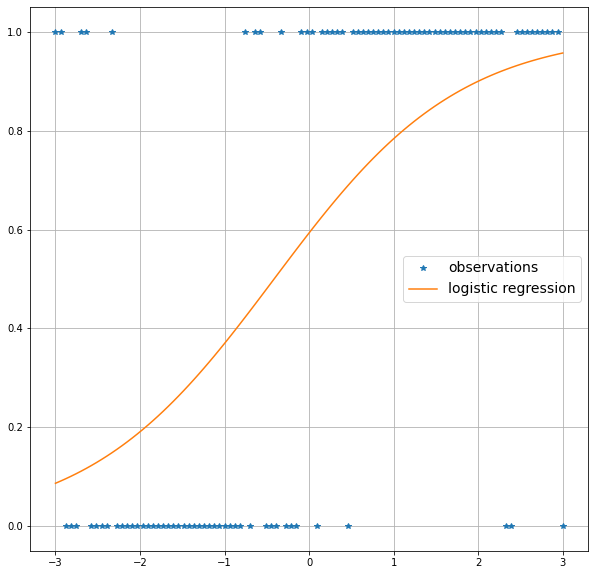

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, '*', label='observations')
plt.plot(x, prediction, label='logistic regression')

plt.grid()
plt.legend(fontsize=14)
plt.show()

## Local regression

As we can see, the dependence of the outcome on $x$ looks more complex than estimated using logistic regression. We will try to improve it with local regression methods.
Instead of a global model, we will approximate conditinal probability of the positive class in a neighbourhood of $x$ with:
$$p(u) \approx \frac{e^{\beta_0 + \beta_1 (u-x) }}{1 + e^{\beta_0 + \beta_1 (u-x)}}, $$
for $u$ close to $x$. The coefficients in this case will depend on $x$. To find them, we will have to fit a (slightly different) model **at each new query point** $x_{new}$ (point where we want to predict $Y$). We will also need to introduce a notion of 'closeness' of points across $x$ - for this we can use our familiar *kernel functions*. Bringing everything together, we introduce the following **local** loglikelihood for our proposed model:
$$\ell_x(\beta) = \sum\limits_{i=1}^{n} K\left(\frac{x-X_i}{h}\right)\ell\left(Y_i, \beta_0 + \beta_1 \left(X_i - x\right)\right) = \sum\limits_{i=1}^{n} K\left(\frac{x-X_i}{h}\right) \left(Y_i \left(\beta_0 + \beta_1 \left(X_i - x\right)\right) - \log \left( 1 + e^{\beta_0 + \beta_1 \left(X_i - x\right)} \right) \right),$$
$$\ell(y, z) = yz - \log \left(1 + e^z \right).$$
Here $\ell(y, z)$ is a log-likelohood for a single Bernoulli with log-dds ratio $z = \log\frac{p}{1-p}$. The local log-likelihood $\ell_x(\beta)$ should be optimized numerically for each new point $x$ to obtain $\widehat{\beta}(x)=(\widehat{\beta_0}(x), \widehat{\beta_1}(x))$. Then, we can predict $Y$ using the logistic model:
$$ \mathbb{P}(Y=1 | X=x) = \frac{e^{\beta_0(x)}}{1 + e^{\beta_0(x)}}.$$
Your task is:
1. Implement the proposed local logistic regression approach using Gaussian kernel. *Hint*: look at additional parameters of the `fit` method of [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from `sklearn` package (2 points)

In [ ]:
def gaussian_kernel(x, bandwidth):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-x ** 2 / (2 * bandwidth))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
class LocalLogisticRegression():
    def __init__(self, bandwidth=1):
        self.bandwidth = bandwidth
    
    def fit(self, x, y):
        self.x_sample = x
        self.y_sample = y

    def predict_proba(self, x):
        z_sample = self.x_sample - x
        weights = gaussian_kernel(z_sample.reshape(-1), self.bandwidth)

        logreg = LogisticRegression()
        logreg.fit(z_sample, self.y_sample, weights)

        return sigmoid(logreg.intercept_)
    
    def predict(self, x):
        return int(self.predict_proba(x) > 0.5)

2. Select optimal bandwidth using leave-one-out log-likelihood cross-validation with log-likelihood as metric: $\ell_{cv} = \sum_i \ell(Y_i, \widehat{z}_{-i}(x_i))$, where $\widehat{z}_{-i}$ is the estimated log-odds ratio without $i$th sample (3 points)

In [ ]:
def cross_validation_local_logreg(x, y, bandwidth):
    scores = np.zeros(len(x))

    for i in range(len(x)):
        x_in, x_out = np.delete(x, i, axis=0), x[i]
        y_in, y_out = np.delete(y, i, axis=0), y[i]

        local_logreg = LocalLogisticRegression(bandwidth=bandwidth)

        local_logreg.fit(x_in, y_in)
        prob_out = local_logreg.predict_proba(x_out)

        log_likelihood = y_out * np.log(prob_out) + (1 - y_out) * np.log(1 - prob_out)
        scores[i] = log_likelihood
    
    return np.sum(scores)

In [ ]:
bandwidth_space = np.logspace(-2, 1, num=100, base=10)
cv_space = np.array([cross_validation_local_logreg(x, y, bandwidth) for bandwidth in tqdm(bandwidth_space)])

100%|██████████| 100/100 [00:22<00:00,  4.39it/s]


In [ ]:
bandwidth_optimal = bandwidth_space[np.argmax(cv_space)]

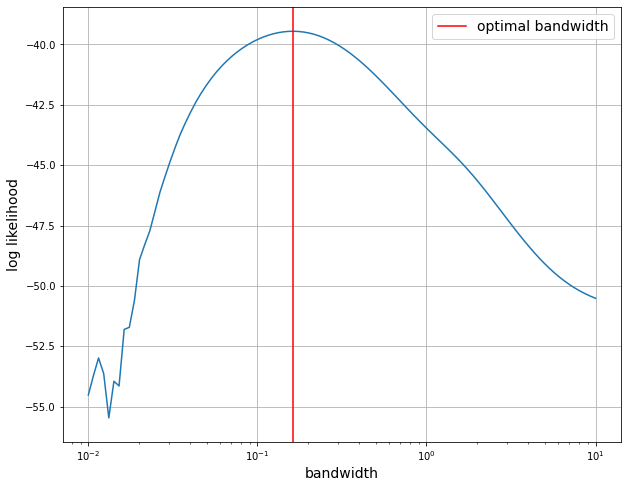

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(bandwidth_space, cv_space)
plt.axvline(bandwidth_optimal, label='optimal bandwidth', color='red')
plt.xscale('log', basex=10)

plt.xlabel('bandwidth', fontsize=14)
plt.ylabel('log likelihood', fontsize=14)

plt.ylim(min(cv_space) - 1, max(cv_space) + 1)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [ ]:
bandwidth_optimal

0.16297508346206444

In [ ]:
local_logreg = LocalLogisticRegression(bandwidth=bandwidth_optimal)
local_logreg.fit(x, y)

In [ ]:
prediction = [local_logreg.predict_proba(value) for value in x]

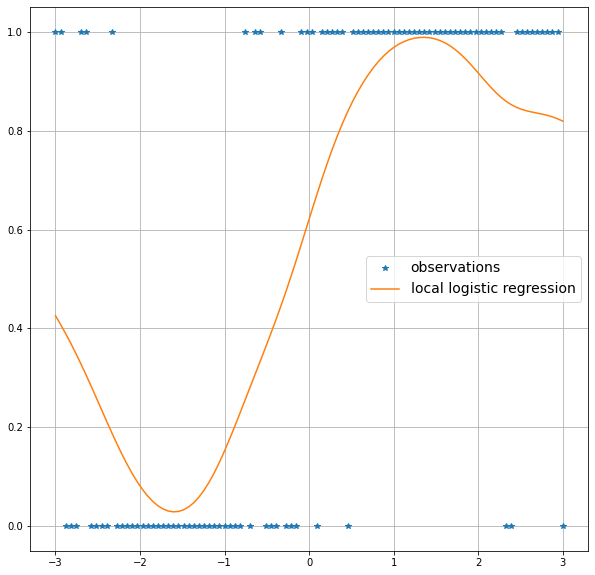

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, '*', label='observations')
plt.plot(x, prediction, label='local logistic regression')

plt.grid()
plt.legend(fontsize=14)
plt.show()

3. Now ignore that the output variable is binary. Compare previous results with local linear kernel regression method using `KernelReg` from `statsmodels`. Use leave-one out squared error cross-validation to select the bandwidth (1 bonus point)

In [ ]:
from statsmodels.nonparametric.kernel_regression import KernelReg

In [ ]:
def cross_validation_kernel_reg(x, y, bandwidth):
    scores = np.zeros(len(x))

    for i in range(len(x)):
        x_in, x_out = np.delete(x, i, axis=0), x[i]
        y_in, y_out = np.delete(y, i, axis=0), y[i]

        kernel_reg = KernelReg(y_in, x_in, var_type='c', reg_type='ll', bw=[bandwidth])
        prediction_out = kernel_reg.fit(x_out)[0][0]

        squared_error = (y_out - prediction_out) ** 2
        scores[i] = squared_error
    
    return np.sum(scores)

In [ ]:
bandwidth_space = np.logspace(-2, 1, num=100, base=10)
cv_space = np.array([cross_validation_kernel_reg(x, y, bandwidth) for bandwidth in tqdm(bandwidth_space)])

100%|██████████| 100/100 [00:02<00:00, 36.07it/s]


In [ ]:
bandwidth_optimal = bandwidth_space[np.argmin(cv_space)]

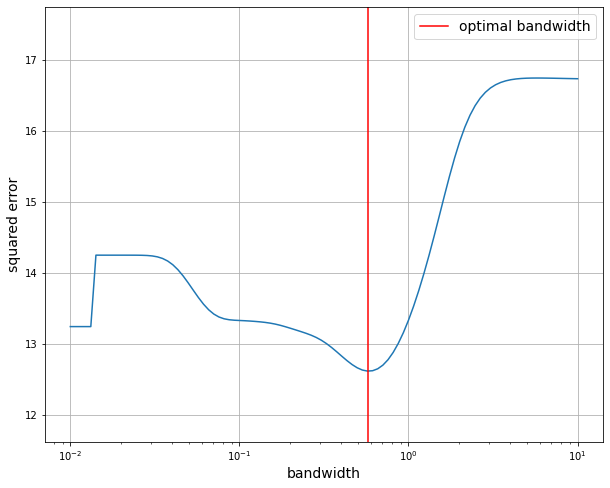

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(bandwidth_space, cv_space)
plt.axvline(bandwidth_optimal, label='optimal bandwidth', color='red')
plt.xscale('log', basex=10)

plt.xlabel('bandwidth', fontsize=14)
plt.ylabel('squared error', fontsize=14)

plt.ylim(min(cv_space) - 1, max(cv_space) + 1)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [ ]:
bandwidth_optimal

0.5722367659350217

In [ ]:
kernel_reg = KernelReg(y, x, var_type='c', reg_type='ll', bw=[bandwidth_optimal])

In [ ]:
prediction = kernel_reg.fit(x)[0]

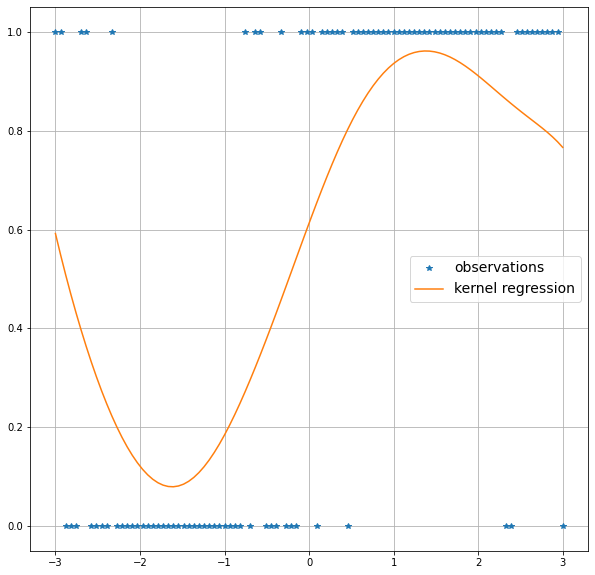

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, '*', label='observations')
plt.plot(x, prediction, label='kernel regression')

plt.grid()
plt.legend(fontsize=14)
plt.show()